<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Company-Level" data-toc-modified-id="Company-Level-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Company Level</a></span><ul class="toc-item"><li><span><a href="#Application-Status----Value" data-toc-modified-id="Application-Status----Value-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Application Status -  Value</a></span></li><li><span><a href="#Application-Status---Frequency---BETA-VALUES---WILL-CHANGE" data-toc-modified-id="Application-Status---Frequency---BETA-VALUES---WILL-CHANGE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Application Status - Frequency - BETA VALUES - WILL CHANGE</a></span></li><li><span><a href="#Application-Processing-Times---BETA---KPI-VALUES-WILL-CHANGE" data-toc-modified-id="Application-Processing-Times---BETA---KPI-VALUES-WILL-CHANGE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Application Processing Times - BETA - KPI VALUES WILL CHANGE</a></span></li><li><span><a href="#Application-Completion-Time----BETA---KPI-VALUES-WILL-CHANGE" data-toc-modified-id="Application-Completion-Time----BETA---KPI-VALUES-WILL-CHANGE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Application Completion Time  - BETA - KPI VALUES WILL CHANGE</a></span></li><li><span><a href="#PAR-Frequency-and-Value" data-toc-modified-id="PAR-Frequency-and-Value-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>PAR Frequency and Value</a></span></li></ul></li><li><span><a href="#Productivity" data-toc-modified-id="Productivity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Productivity</a></span><ul class="toc-item"><li><span><a href="#Sales-Team---Value-of-Loans-Signed" data-toc-modified-id="Sales-Team---Value-of-Loans-Signed-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sales Team - Value of Loans Signed</a></span></li><li><span><a href="#Sales-Team---Value-Signed-by-Client-Type" data-toc-modified-id="Sales-Team---Value-Signed-by-Client-Type-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sales Team - Value Signed by Client Type</a></span></li><li><span><a href="#Sales-Team---Leads-and-Rejected-Applications" data-toc-modified-id="Sales-Team---Leads-and-Rejected-Applications-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sales Team - Leads and Rejected Applications</a></span></li><li><span><a href="#Credit-Team---Decisions-and-Rejections" data-toc-modified-id="Credit-Team---Decisions-and-Rejections-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Credit Team - Decisions and Rejections</a></span></li></ul></li><li><span><a href="#Quality" data-toc-modified-id="Quality-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quality</a></span><ul class="toc-item"><li><span><a href="#PAR-Amount-by-Team" data-toc-modified-id="PAR-Amount-by-Team-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PAR Amount by Team</a></span></li><li><span><a href="#PAR-Frequency-by-Team" data-toc-modified-id="PAR-Frequency-by-Team-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PAR Frequency by Team</a></span></li></ul></li><li><span><a href="#Efficiency" data-toc-modified-id="Efficiency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Efficiency</a></span><ul class="toc-item"><li><span><a href="#Assets-Under-Management-per-Employee" data-toc-modified-id="Assets-Under-Management-per-Employee-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Assets Under Management per Employee</a></span></li><li><span><a href="#Credit-Team---Application-Processing-Time" data-toc-modified-id="Credit-Team---Application-Processing-Time-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Credit Team - Application Processing Time</a></span></li><li><span><a href="#Sales-Team---Completion-and-Processing-Time" data-toc-modified-id="Sales-Team---Completion-and-Processing-Time-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sales Team - Completion and Processing Time</a></span></li></ul></li></ul></div>

# KPI Report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pymysql
import datetime
%matplotlib inline
# liwwa_colors = ["#DC8E2D","#ECE4DB","#0F77B1","#539BC3","#D9E2E8","#A8005C","#BD4888","#E7D7E0"]
# liwwa_nonwhite = ["#DC8E2D", "#0F77B1","#539BC3","#A8005C","#BD4888","#E7D7E0"]
# sns.set(rc={'figure.figsize':(12, 8), 'font.size':14}, style='whitegrid', color_codes=liwwa_colors)
# plt.rcParams.update({'font.size': 14})
# plt.rcParams.update({'figure.figsize': (12, 8)})
# plt.rc('axes',labelsize=14)
# plt.rc('xtick', labelsize=14)   
# plt.rc('ytick', labelsize=14) 
# plt.rc('figure', titlesize=14)
# plt.rc('axes.spines', top=False)
# plt.rc('axes.spines', right=False)
# fontdict={'fontsize': 20}
# pd.plotting.register_matplotlib_converters(explicit=True)

In [49]:
%load_ext autoreload
%autoreload 2
from BarPlot import BarPlot
from LinePlot import LinePlot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def run_sql(query):
    try:
        connection = pymysql.connect(
                host='replicadb.liwwahq.com', 
                port=3306,
                user='liwwaro',
                passwd='liwwa_read_0nly', 
                db='liwwa'
            )
    except pymysql.OperationalError:

        print("Failed to connect to database. Do you have a VPN connection?")

        return None

    results = pd.read_sql(query, con=connection)

    connection.close()

    return results

In [3]:
def add_annotation(ax, spacing=2, **kwargs):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = 2
        va = 'bottom'
            
        if 'int' in kwargs:
            label = f"{float(y_value):.0f}"
            if 'money' in kwargs:
                label = f"${int(label):,}"
                
        if 'round_0' in kwargs:
            label = f"{y_value:.1f}"
            if 'money' in kwargs:
                label = f"${float(label):,}"
                
        if 'round_2' in kwargs:
            label = f"{y_value:.2f}"
            
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va, 
            fontsize=14)    

In [4]:
def kpi_barplot(df,y_column, x_label_str, y_label_str, title_str, **kwargs):
    plot_df = df[df['kpi_category']==y_column]
    plot_df = plot_df.sort_values('kpi_value')
    plt.figure(figsize=(12,8))
    ax = sns.barplot(x='full name', y='kpi_value',
                     data=plot_df, palette=liwwa_colors, ci=None)
    ax.tick_params(axis='x',labelrotation=15)
    ax.set_ylabel(y_label_str)
    ax.set_xlabel(x_label_str)
    ax.set_title(title_str, fontdict={'fontsize': 20})
    if 'caption' in kwargs:
        plt.figtext(0.5, -0.05, kwargs['caption'], 
                    wrap=True,horizontalalignment='center', 
                    fontsize=14)    
    if 'annot' in kwargs:
        add_annotation(ax, **kwargs)           
    plt.tight_layout()

In [5]:
def name_process(row, index):
    return row.split('_')[index]

def label_month(df, interval):
    date = pd.to_datetime('today')
    if interval == 'month':
        df['date_to_month'] = df['date_to'].map(lambda x: x.month)
        return df
    
def extract_values(df, state, time):
    value = df[(df['date_to']==time)&(df['KPI Category']==state)]['kpi_value'].item()
    return value

In [6]:
kpi_flow_query = """
    SELECT au.first_name, au.last_name, 
           staff_team, kpi_category, kpi_value,
           FROM_UNIXTIME(date_from) AS 'date_from',
           FROM_UNIXTIME(date_to) AS 'date_to'
    FROM kpi_flow AS kf
    JOIN admin_users AS au
    ON au.id = kf.staff
    WHERE time_period = 'monthly';
"""
kpi_stock_query = """
    SELECT day, month, year,
           aum_per_employee_amount
    FROM kpi_stock
"""
company_kpi_query = """
    SELECT kpi_category, kpi_value, 
           statistic, time_period, 
           from_unixtime(date_from) as 'date_from', 
           from_unixtime(date_to) as 'date_to'
    FROM kpi_flow
    WHERE kpi_level = 'company' AND time_period = 'monthly'
    
"""
par_query = """
    SELECT delinquency_category, principal_outstanding_flat_amount,
           principal_outstanding_flat_currency, loan_status,
           FROM_UNIXTIME(update_date) AS 'update_date'
    FROM campaign_loan_infos
    WHERE loan_status = 'delinquent'
    ORDER BY delinquency_category;
"""
team_par_query = """
    SELECT au.last_name, au.first_name, kpi_category, kpi_value, 
           statistic, time_period, 
           from_unixtime(kf.date_from, '%M - %d') as 'date_from', 
           from_unixtime(kf.date_to, '%M - %d') as 'date_to'
    FROM kpi_flow AS kf
    JOIN admin_users AS au
    ON au.id = kf.staff
    WHERE kpi_category IN 
            ('par30_amount', 'par60_amount', 
            'par120_amount', 'par180_amount',
            'par30_rate', 'par60_rate', 
            'par120_rate', 'par180_rate')
    AND time_period = 'weekly'
    ORDER BY 'date_to' DESC
"""

In [7]:
kpi_df = run_sql(kpi_flow_query)
aum_df = run_sql(kpi_stock_query)
company_kpi_df = run_sql(company_kpi_query)
par_df = run_sql(par_query)
team_par_df = run_sql(team_par_query)

In [8]:
kpi_df = label_month(kpi_df, 'month')

In [9]:
kpi_df['full name'] = kpi_df.first_name + ' ' + kpi_df.last_name
kpi_df.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [10]:
previous_month = True
if previous_month == True:
    prev_month = (pd.to_datetime('today').date() - pd.DateOffset(day=1))
    two_prev_month = (pd.to_datetime('today').date() - pd.DateOffset(months=1, day=1))
    cut_off = prev_month
    end_date = str(cut_off.month_name()) +'-'+ str(cut_off.day)
    start_date = str(two_prev_month.month_name()) +'-'+ str(two_prev_month.day)
else:
    cut_off =pd.to_datetime('today').date() - pd.DateOffset(day=1)
    prev_month = (pd.to_datetime('today').date() - pd.DateOffset(months=1, day=1))
    end_date = str(cut_off.month_name()) +'-'+ str(cut_off.day)
    start_date = str(prev_month.month_name()) +'-'+ str(prev_month.day)
company_kpi_df['date_to'] = pd.DatetimeIndex(company_kpi_df.date_to).normalize()
company_kpi_df['date_from'] = pd.DatetimeIndex(company_kpi_df.date_to).normalize()
company_current_df = company_kpi_df[company_kpi_df['date_to'] == cut_off]

All figures in this report contain values from the following period unless otherwise stated:

In [11]:
print(f'{start_date} - {end_date}')

November-1 - December-1


In [12]:
kpi_df = kpi_df[kpi_df['date_to_month']==cut_off.month]

In [13]:
sales_kpi_df = kpi_df[kpi_df['staff_team'] == 'sales']
credit_kpi_df = kpi_df[kpi_df['staff_team'] == 'credit']
sales_team_list = sales_kpi_df['full name'].to_list()
credit_team_list = credit_kpi_df['full name'].to_list()

In [14]:
company_current_df = company_current_df.groupby(['statistic','kpi_category'])['kpi_value'].min().reset_index()

In [15]:
completion_time_df = company_current_df[company_current_df['statistic'] == 'mean'].set_index('kpi_category') \
    .loc[['completion_time_inbound_sales','completion_time_marketing',
          'completion_time_outbound_sales','completion_time_repeat']]
history_completion_df = company_kpi_df[company_kpi_df['statistic'] == 'mean'].set_index('kpi_category') \
    .loc[['completion_time_inbound_sales','completion_time_marketing',
          'completion_time_outbound_sales','completion_time_repeat']]
history_completion_df = history_completion_df[history_completion_df['date_to'] <= cut_off]

In [16]:
process_time_df = company_kpi_df[company_kpi_df['statistic'] == 'mean'].set_index('kpi_category') \
    .loc[['credit_processing_time','sales_processing_time']] #,'am_processing_time']]

In [17]:
applications_df = company_kpi_df[company_kpi_df['statistic'] == 'count']

In [18]:
signed_df = company_current_df[company_current_df['statistic'] == 'asum']

In [19]:
%%latex 
\pagebreak

<IPython.core.display.Latex object>

## Company Level 

### Application Status -  Value

In [69]:
signed = extract_values(history_plot_signed, 'signed',cut_off)
signed

3297590.0

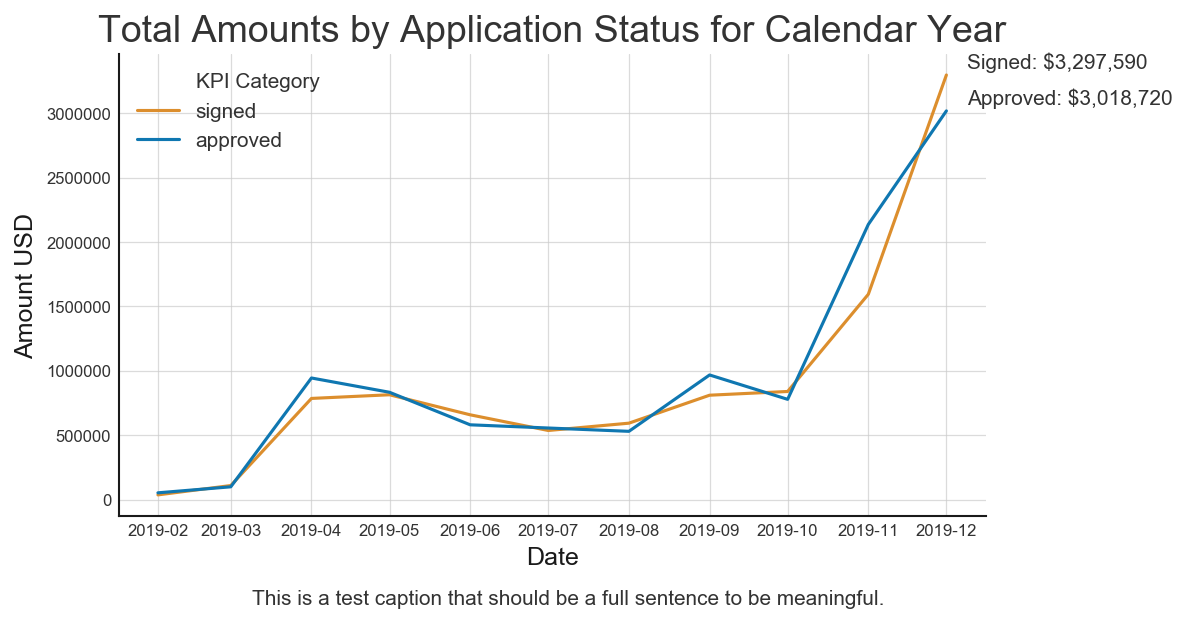

In [99]:
history_plot_signed = company_kpi_df[company_kpi_df['date_to'] <= cut_off]
history_plot_signed = history_plot_signed.set_index('kpi_category') \
            .loc[['total_amount_signed','total_amount_approved']] \
            .reset_index()
history_plot_signed.kpi_category = history_plot_signed['kpi_category'] \
            .apply(lambda x: x.replace('_',' ').replace('total amount ',''))
history_plot_signed.rename(columns={'kpi_category': 'KPI Category'}, inplace=True)
x_value = history_plot_signed[history_plot_signed['date_to']==cut_off]['date_to'].reset_index(drop=True)[0]
signed = extract_values(history_plot_signed, 'signed',cut_off)
approved = extract_values(history_plot_signed, 'approved', cut_off)
LinePlot(
        x_axis=history_plot_signed.date_to,
        y_axis=history_plot_signed.kpi_value,
        x_label='Date',
        y_label='Amount USD',
        title= 'Total Amounts by Application Status for Calendar Year'
).make_line_plot(
        hue=history_plot_signed['KPI Category'], 
        annot_labels=['signed', 'approved'],
        annot_values=[signed, approved], 
        annot_x_value=x_value,
        money=True,
        caption='This is a test caption that should be a full sentence to be meaningful.')
# plt.figure(figsize=(12,8))
# ax = sns.lineplot(x=history_plot_signed.date_to,
#              y=history_plot_signed.kpi_value, 
#              hue=history_plot_signed['KPI Category'],
#              palette=["#0F77B1","#DC8E2D"])
# #===============================Annotation =========================================
# x_value = history_plot_signed[history_plot_signed['date_to']==cut_off]['date_to'].reset_index(drop=True)[0]
# signed = extract_values(history_plot_signed, 'signed',cut_off)
# approved = extract_values(history_plot_signed, 'approved', cut_off)
# ax.annotate(s=f"Signed: ${int(signed):,}", xy=(x_value, signed), fontsize=14, xytext=(0,5),         
#             textcoords="offset points")
# ax.annotate(s=f"Approved: ${int(approved):,}", xy=(x_value, approved), fontsize=14,xytext=(0,5),         
#             textcoords="offset points")
# #====================================================================================
# plt.legend(loc='upper left')
# plt.ylabel('Amount USD')
# plt.xlabel('Date')
# plt.title('Total Amounts by Application Status for Calendar Year', fontdict)
# plt.tight_layout()

In [94]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Application Status - Frequency - BETA VALUES - WILL CHANGE

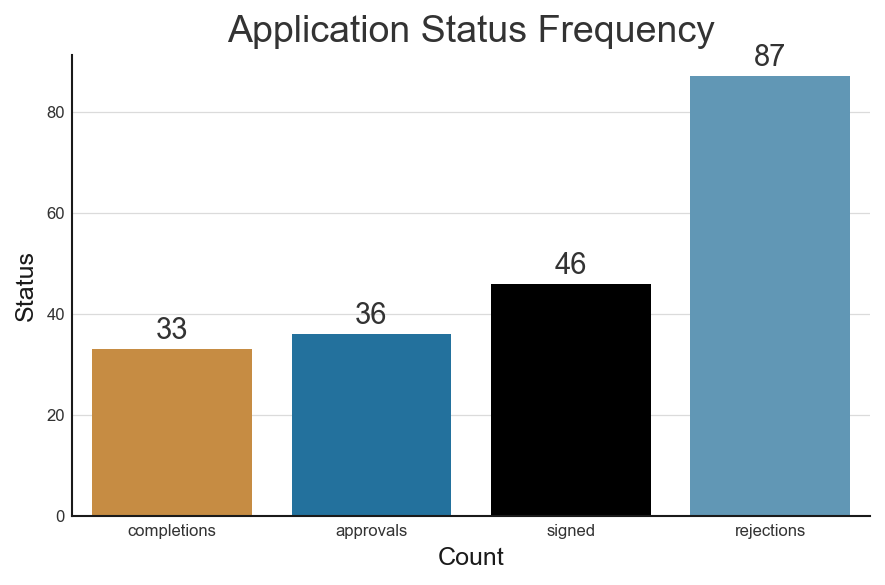

In [90]:
plot_df = applications_df[applications_df['date_to'] == cut_off]
plot_df = plot_df.set_index('kpi_category') \
            .loc[['completions','approvals', 'signed','rejections']] \
            .reset_index()
label = plot_df['kpi_category'].apply(lambda x: x.replace('_',' '))
app_status = BarPlot(
                    dataframe=plot_df,
                    x_axis=plot_df.index,
                    y_axis='kpi_value',
                    x_label='Count',
                    y_label='Status',
                    title='Application Status Frequency'
).make_bar_plot(annot=True, int=True)
# plt.figure(figsize=(12,8))
# ax = sns.barplot(x=plot_df.index, y=plot_df.kpi_value, palette=["#DC8E2D", "#0F77B1","black","#BD4888"])
plt.xticks(labels=label, ticks=range(len(label)))
# plt.ylabel('Count')
# plt.xlabel('Status')
# plt.title('Application Status Frequency', fontdict)
# add_annotation(ax, int=True)
# caption = 'Approved, signed, and rejected loans may include applications completed in previous months'
# plt.figtext(0.52, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
plt.tight_layout()

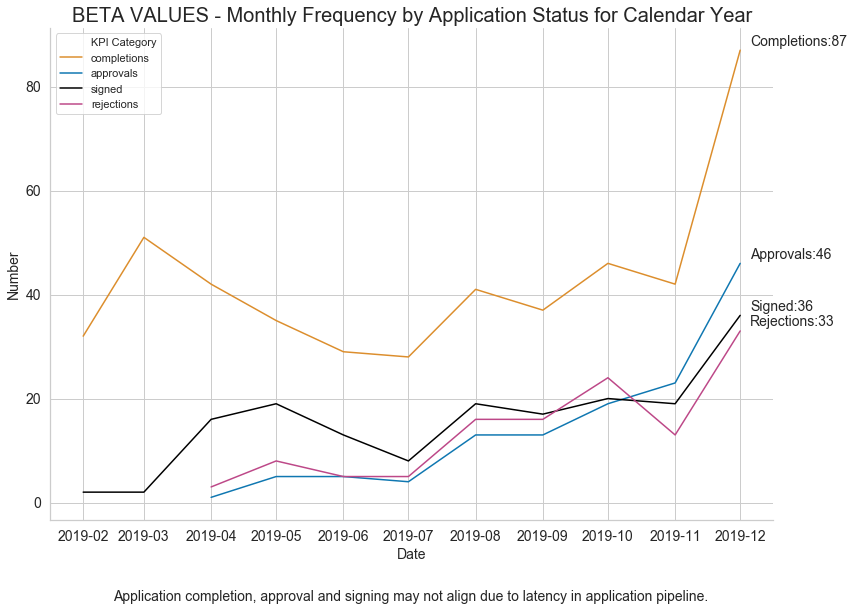

In [25]:
history_applications_plot = applications_df[applications_df['date_to'] <= cut_off]
history_applications_plot = history_applications_plot.set_index('kpi_category') \
            .loc[['completions','approvals', 'signed','rejections']] \
            .reset_index()
history_applications_plot.rename(columns={'kpi_category': 'KPI Category'}, inplace=True)
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=history_applications_plot.date_to,
             y=history_applications_plot.kpi_value, 
             hue=history_applications_plot['KPI Category'],
             palette=["#DC8E2D","#0F77B1","black","#BD4888"], 
             )
plt.legend(loc='upper left')
plt.ylabel('Number')
plt.xlabel('Date')
plt.title('BETA VALUES - Monthly Frequency by Application Status for Calendar Year', 
          fontdict)
#======================================Annotation================================================
states = ['signed','approvals','completions','rejections']
values = [extract_values(history_applications_plot, i, cut_off) for i in states]
x_value = history_applications_plot[history_applications_plot['date_to']==cut_off]['date_to'].reset_index(drop=True)[0]
for i in range(len(states)):
    ax.annotate(s=f"{states[i].title()}:{int(values[i]):,}", 
                xy=(x_value,
                values[i]),
                fontsize=14,
                xytext=(10,5),      
                textcoords="offset points")
#===============================================================================
caption = 'Application completion, approval and signing may not align due to latency in application pipeline.'
plt.figtext(0.48, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
plt.tight_layout()

In [26]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Application Processing Times - BETA - KPI VALUES WILL CHANGE

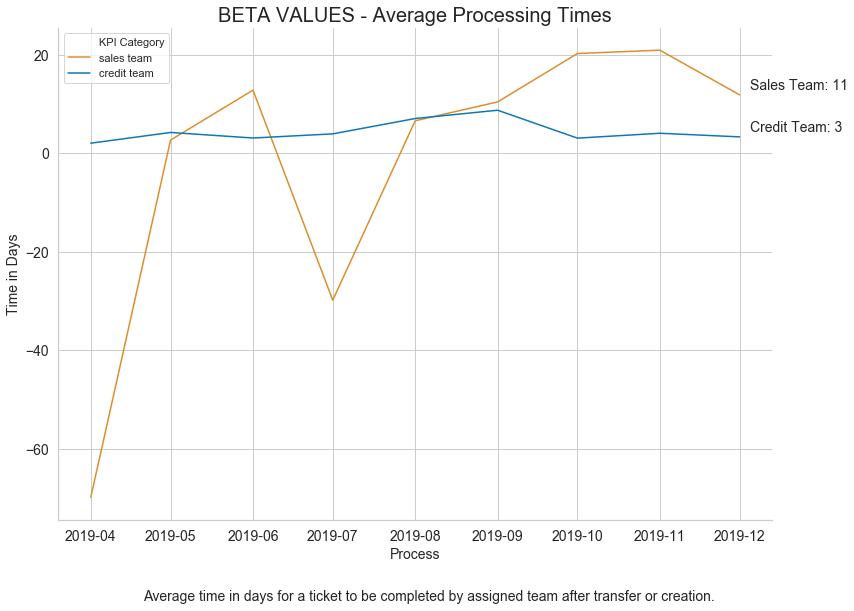

In [27]:
plot_df = process_time_df[process_time_df['date_to'] <= cut_off] \
                .sort_values(['kpi_value']).reset_index() \
                .rename(columns={'kpi_category':'KPI Category'})
plot_df['KPI Category'] = plot_df['KPI Category'] \
                .apply(lambda x: x.replace('_processing_time',' team'))
plt.figure(figsize=(12,8))
ax =sns.lineplot(x=plot_df.date_to,
                 y=plot_df.kpi_value,
                 hue=plot_df['KPI Category'], 
                 palette=["#DC8E2D","#0F77B1"])
#======================================Annotation================================================
sales = extract_values(plot_df, 'sales team', cut_off)
credit = extract_values(plot_df, 'credit team', cut_off)
#accounts = extract_values(plot_df, 'accounts team', cut_off)
ax.annotate(s=f"Sales Team: {int(sales):,}", xy=(x_value, sales), fontsize=14, xytext=(10,5),         
            textcoords="offset points")
ax.annotate(s=f"Credit Team: {int(credit):,}", xy=(x_value, credit), fontsize=14, xytext=(10,5),         
            textcoords="offset points")

caption = 'Average time in days for a ticket to be completed by assigned team after transfer or creation.'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
plt.ylabel('Time in Days')
plt.xlabel('Process')
plt.title('BETA VALUES - Average Processing Times', fontdict)
add_annotation(ax, round=True)
plt.tight_layout()

In [28]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Application Completion Time  - BETA - KPI VALUES WILL CHANGE

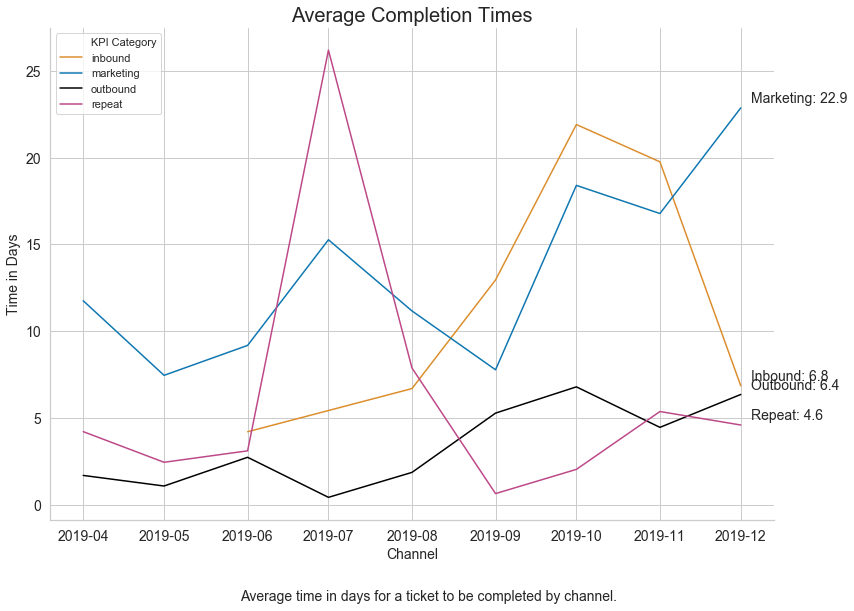

In [29]:
history_completion_plot = history_completion_df \
                .reset_index() \
                .rename(columns={'kpi_category':'KPI Category'})
history_completion_plot['KPI Category'] = history_completion_plot['KPI Category'] \
                .apply(lambda x: name_process(x, 2))
liwwa_colors_1 = liwwa_colors[:4]
plt.figure(figsize=(12,8))
ax =sns.lineplot(x=history_completion_plot.date_to,
                 y=history_completion_plot.kpi_value,
                 hue=history_completion_plot['KPI Category'], 
                 palette=["#DC8E2D", "#0F77B1","black","#BD4888"])
caption = 'Average time in days for a ticket to be completed by channel.'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
channels= ['inbound','marketing','outbound','repeat']
values= [extract_values(history_completion_plot, i, cut_off) for i in channels]
for i in range(len(channels)):
    ax.annotate(s=f"{channels[i].title()}: {values[i]:.1f}", 
                xy=(x_value, values[i]), fontsize=14, xytext=(10,5),         
                textcoords="offset points")
plt.ylabel('Time in Days')
plt.xlabel('Channel')
plt.title('Average Completion Times', fontdict)
plt.legend(loc='upper left')
add_annotation(ax, round=True)
plt.tight_layout()

In [30]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### PAR Frequency and Value

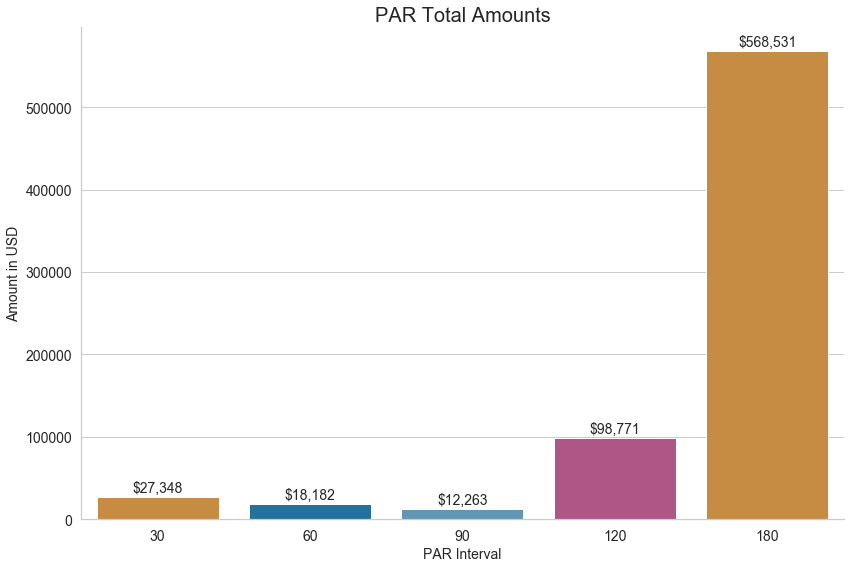

In [31]:
par_plot_df = par_df.groupby('delinquency_category')['principal_outstanding_flat_amount'].sum() \
                    .reset_index()
label = par_plot_df['delinquency_category']
plt.figure(figsize=(12,8))
ax = sns.barplot(x=par_plot_df.index,
                 y=par_plot_df.principal_outstanding_flat_amount,
                 palette=["#DC8E2D", "#0F77B1","#539BC3","#BD4888"])
plt.xticks(labels=label, ticks=range(len(label)))
plt.ylabel('Amount in USD')
plt.xlabel('PAR Interval')
plt.title('PAR Total Amounts', fontdict)

add_annotation(ax, spacing=2,int=True, money=True)
plt.tight_layout()

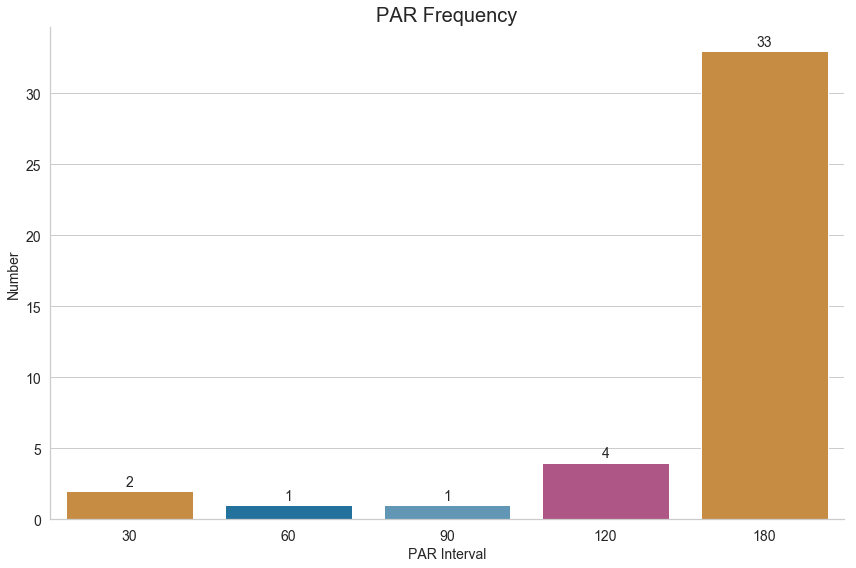

In [32]:
par_plot_df = par_df.groupby('delinquency_category')['principal_outstanding_flat_amount'].count().reset_index()
label = par_plot_df['delinquency_category']
plt.figure(figsize=(12,8))
ax = sns.barplot(x=par_plot_df.index, 
                 y=par_plot_df.principal_outstanding_flat_amount, 
                 palette=["#DC8E2D", "#0F77B1","#539BC3","#BD4888"])
plt.xticks(labels=label, ticks=range(len(label)))
plt.ylabel('Number')
plt.xlabel('PAR Interval')
plt.title('PAR Frequency', fontdict)
add_annotation(ax, int=True)
plt.tight_layout()

In [33]:
# %%latex
# \pagebreak

## Productivity

### Sales Team - Value of Loans Signed

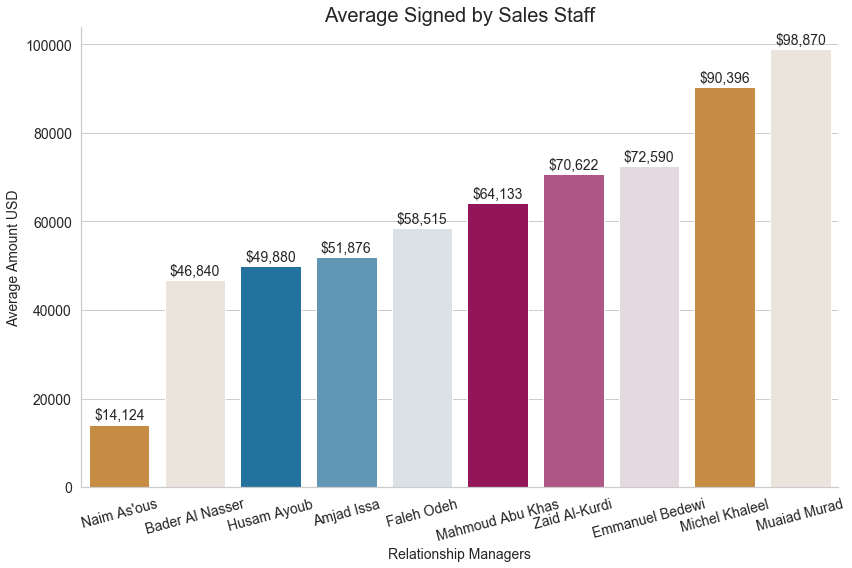

In [34]:
kpi_barplot(df=sales_kpi_df,
            y_column='avg_amount_signed', 
            x_label_str='Relationship Managers',
            y_label_str='Average Amount USD',
            title_str='Average Signed by Sales Staff', 
           annot=True, 
           int=True,
           money=True)

In [35]:
%%latex 
\pagebreak

<IPython.core.display.Latex object>

### Sales Team - Value Signed by Client Type

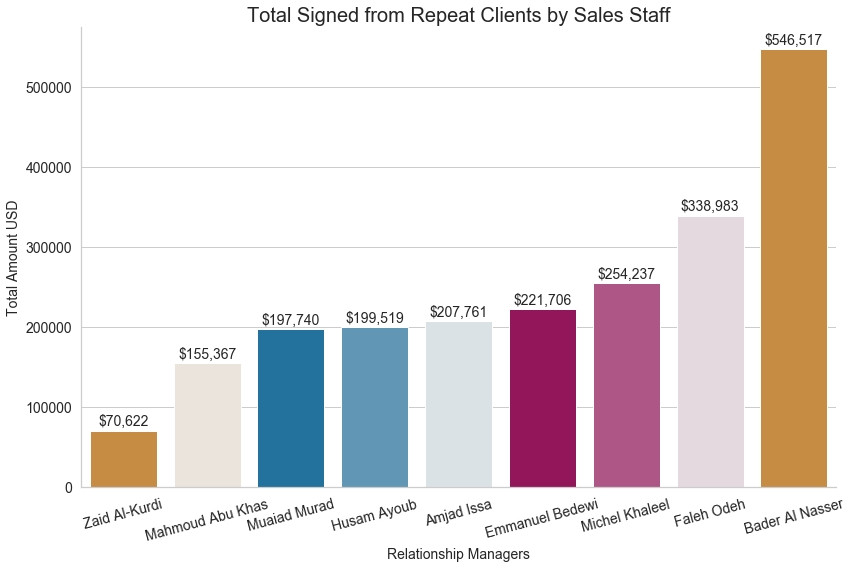

In [36]:
kpi_barplot(df=sales_kpi_df, 
            y_column='total_amount_signed_repeat',
            y_label_str='Total Amount USD',
            x_label_str='Relationship Managers',
            title_str='Total Signed from Repeat Clients by Sales Staff',
           annot=True, 
           int=True,
           money=True)

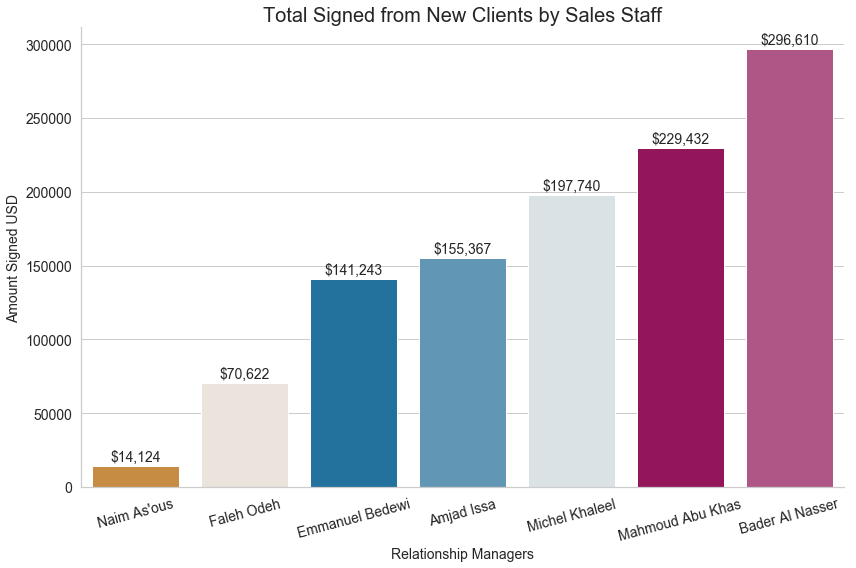

In [37]:
kpi_barplot(df=sales_kpi_df, 
           y_column='total_amount_signed_new',
           x_label_str='Relationship Managers',
           y_label_str='Amount Signed USD',
           title_str='Total Signed from New Clients by Sales Staff',
           annot=True,
           int=True,
           money=True)

In [38]:
# %%latex
# \pagebreak

### Sales Team - Leads and Rejected Applications

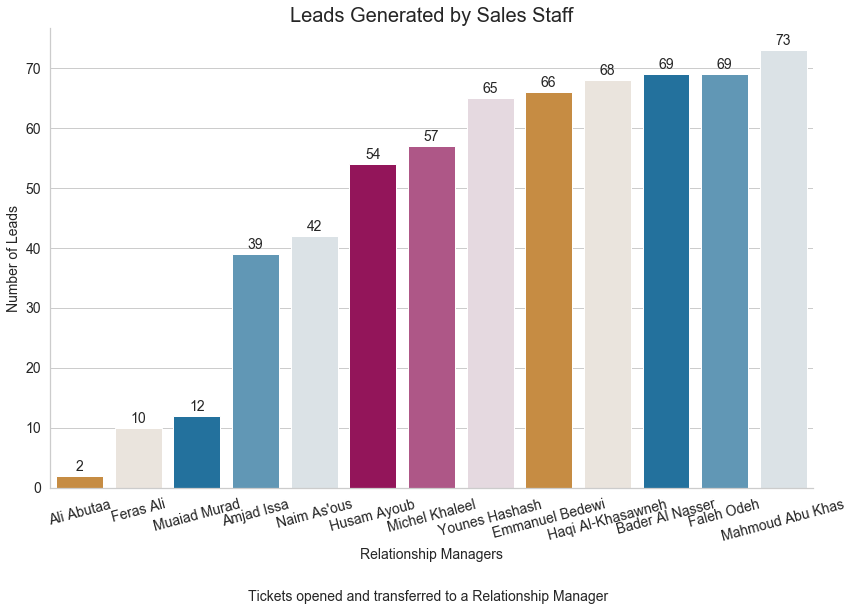

In [39]:
kpi_barplot(df=sales_kpi_df, 
           y_column='leads_generated_by_sales',
           x_label_str='Relationship Managers',
           y_label_str='Number of Leads',
           title_str='Leads Generated by Sales Staff', 
           caption = 'Tickets opened and transferred to a Relationship Manager',
           annot = True,
           int= True
           )

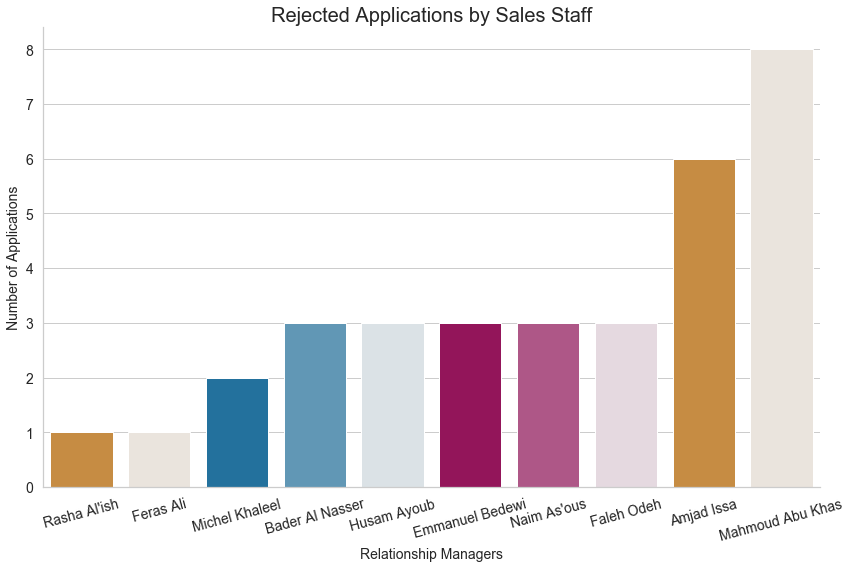

In [40]:
kpi_barplot(df=sales_kpi_df, 
           y_column='rejections',
           x_label_str='Relationship Managers',
           y_label_str='Number of Applications',
           title_str='Rejected Applications by Sales Staff' 
           )

In [41]:
# %%latex 
# \pagebreak

### Credit Team - Decisions and Rejections

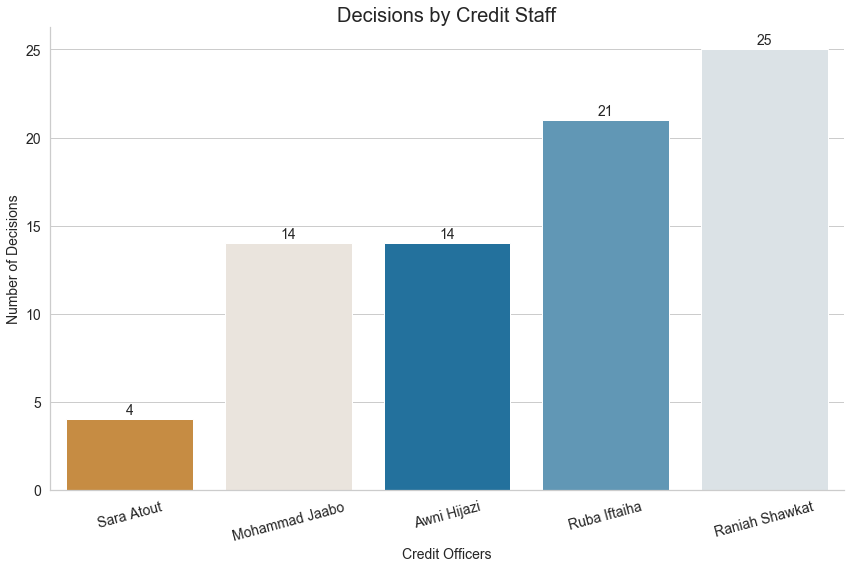

In [66]:
kpi_barplot(df=credit_kpi_df,
            y_column='decisions', 
            x_label_str='Credit Officers',
            y_label_str='Number of Decisions',
            title_str='Decisions by Credit Staff',
            annot=True,
            int=True)

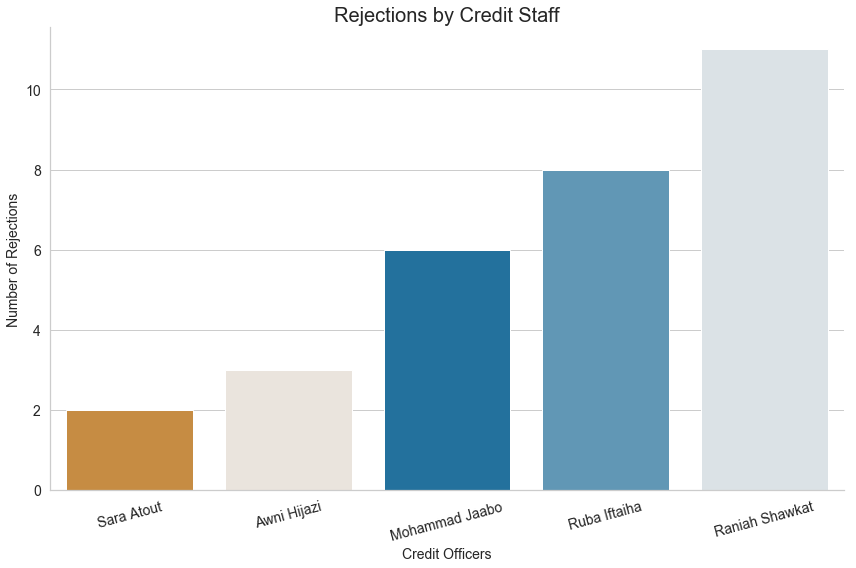

In [43]:
kpi_barplot(df=credit_kpi_df,
            y_column='rejections', 
            x_label_str='Credit Officers',
            y_label_str='Number of Rejections',
            title_str='Rejections by Credit Staff')

In [44]:
# %%latex
# \pagebreak

## Quality

### PAR Amount by Team

In [45]:
team_par_df['full name'] = team_par_df.first_name + ' ' + team_par_df.last_name
team_par_df.drop(['first_name', 'last_name'], axis=1, inplace=True)
#print(f' PAR amount (USD) figures by team member updated as of: {recent_week}')

In [46]:
last_date_to = len(team_par_df) - 1
recent_week = team_par_df['date_to'][last_date_to]
team_par_df = team_par_df[team_par_df['date_to']==recent_week]

In [47]:
def rate_amount_labeler(row):
    if row.endswith('amount') == True:
        label = 'amount'
    else:
        label = 'rate'
    return label

In [48]:
team_par_df['label'] = team_par_df['kpi_category'].apply(lambda x: rate_amount_labeler(x)) 
par_amount_plot = team_par_df[team_par_df['label']=='amount'].reset_index(drop=True)
par_rate_plot = team_par_df[team_par_df['label']=='rate'].reset_index(drop=True)

In [49]:
par_amount_plot['kpi_category'] = par_amount_plot['kpi_category'].apply(lambda x: x.replace('_amount',''))
par_amount_plot['kpi_category'] = par_amount_plot['kpi_category'].apply(lambda x: x[:3]+' '+x[3:])
par_rate_plot['kpi_category'] = par_amount_plot['kpi_category'].apply(lambda x: x.replace('_rate',''))
par_rate_plot['kpi_category'] = par_amount_plot['kpi_category'].apply(lambda x: x[:3]+' '+x[3:])

In [50]:
# par_amount_table = par_amount_plot.drop(['statistic','time_period','date_from', 'date_to', 'label'], axis=1) \
#                                 .rename(columns={'kpi_category':'Amount', 'full name':'Full Name'}) \
#                                 .pivot(index='Amount', columns='Full Name', values='kpi_value')
# par_rate_table = par_rate_plot.drop(['statistic','time_period','date_from', 'date_to', 'label'], axis=1) \
#                                 .rename(columns={'kpi_category':'Rate', 'full name':'Full Name'}) \
#                                 .pivot(index='Rate', columns='Full Name', values='kpi_value')

In [51]:
# par_amount_table.index.name = None
# par_amount_table.columns.name = None
# par_amount_table = par_amount_table.reindex(['par 30', 'par 60', 'par 120', 'par 180']).replace(np.NaN, 0)
# par_rate_table.index.name = None
# par_rate_table.columns.name = None
# par_rate_table = par_rate_table.reindex(['par  30', 'par  60', 'par  120', 'par  180']).replace(np.NaN, 0)

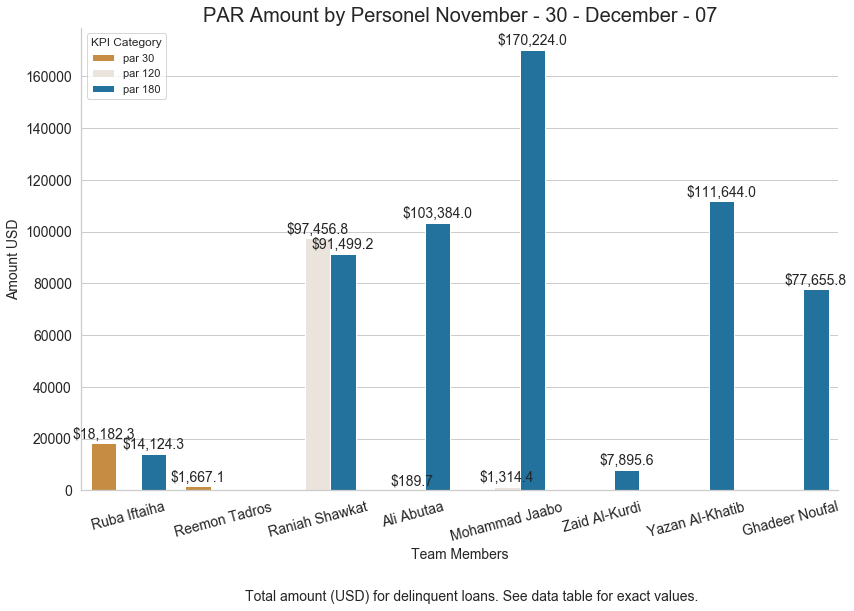

In [52]:
par_amount_plot.rename(columns={'kpi_category':'KPI Category'}, inplace=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=par_amount_plot['full name'], 
            y=par_amount_plot.kpi_value,
            hue=par_amount_plot['KPI Category'], 
            palette=liwwa_colors)
ax.tick_params(axis='x',labelrotation=15)

plt.ylabel('Amount USD')
plt.xlabel('Team Members')
plt.title('PAR Amount by Personel {} - {}'
          .format(par_amount_plot['date_from'][0],
                  par_amount_plot['date_to'][0]), 
                  fontdict)

add_annotation(ax, round_0=True,money=True)
caption = 'Total amount (USD) for delinquent loans. See data table for exact values.'
plt.figtext(0.55, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
plt.tight_layout()

In [53]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### PAR Frequency by Team

In [54]:
print(f'Rate figures are the ratio of loans in a each PAR category to the total number of loans\nassigned to respective team members.')

Rate figures are the ratio of loans in a each PAR category to the total number of loans
assigned to respective team members.


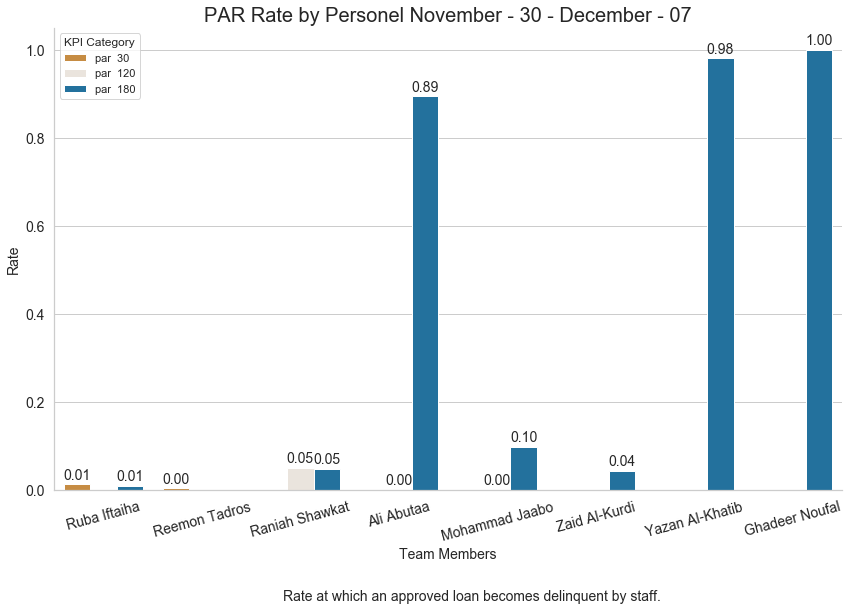

In [55]:
par_rate_plot.rename(columns={'kpi_category':'KPI Category'}, inplace=True)
plt.figure(figsize=(12,8))
ax =sns.barplot(x=par_rate_plot['full name'], 
                y=par_rate_plot.kpi_value,
                hue=par_rate_plot['KPI Category'], 
                palette=liwwa_colors)
ax.tick_params(axis='x',labelrotation=15)
plt.ylabel('Rate')
plt.xlabel('Team Members')
plt.title('PAR Rate by Personel {} - {}'
          .format(par_rate_plot['date_from'][0],
                  par_rate_plot['date_to'][0]), 
                  fontdict)
add_annotation(ax, round_2=True)
caption = 'Rate at which an approved loan becomes delinquent by staff.'
plt.figtext(0.55, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14)
plt.tight_layout()

In [56]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

## Efficiency

### Assets Under Management per Employee

In [57]:
aum_df['time'] = pd.to_datetime(aum_df[['year', 'month', 'day']])
aum_df.drop(['day', 'month', 'year'], axis=1, inplace=True)
if previous_month == True:
    aum_current_period = aum_df[(aum_df['time']<=prev_month)&(aum_df['time']>=two_prev_month)]
    aum_current_period = aum_current_period.set_index('time')
else:
    aum_current_period = aum_df[(aum_df['time']<=cut_off)&(aum_df['time']>=prev_month)]
    aum_current_period = aum_current_period.set_index('time')

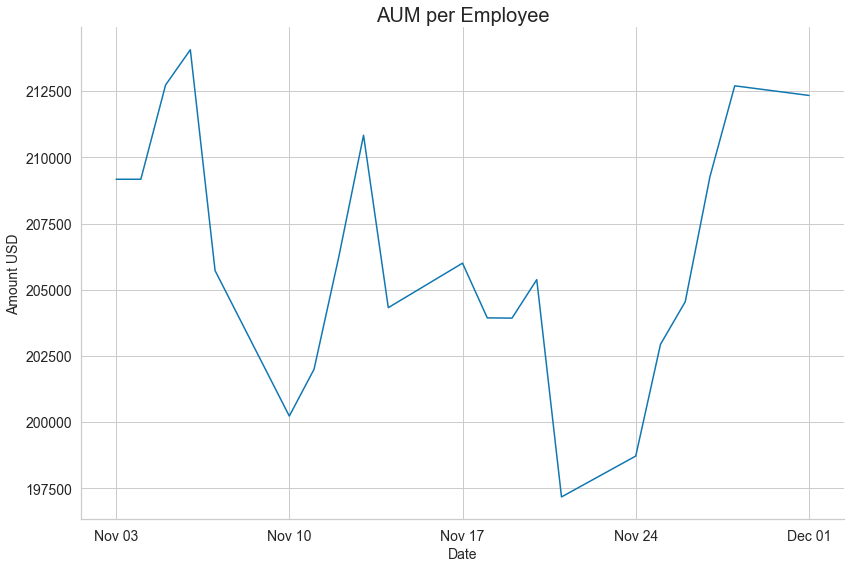

In [58]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(aum_current_period['aum_per_employee_amount'],color=liwwa_colors[2])
ax.tick_params(axis='x',labelrotation=0)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title('AUM per Employee', 
          fontdict)
ax.set_xlabel('Date')
ax.set_ylabel('Amount USD')
plt.tight_layout()

In [59]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Credit Team - Application Processing Time

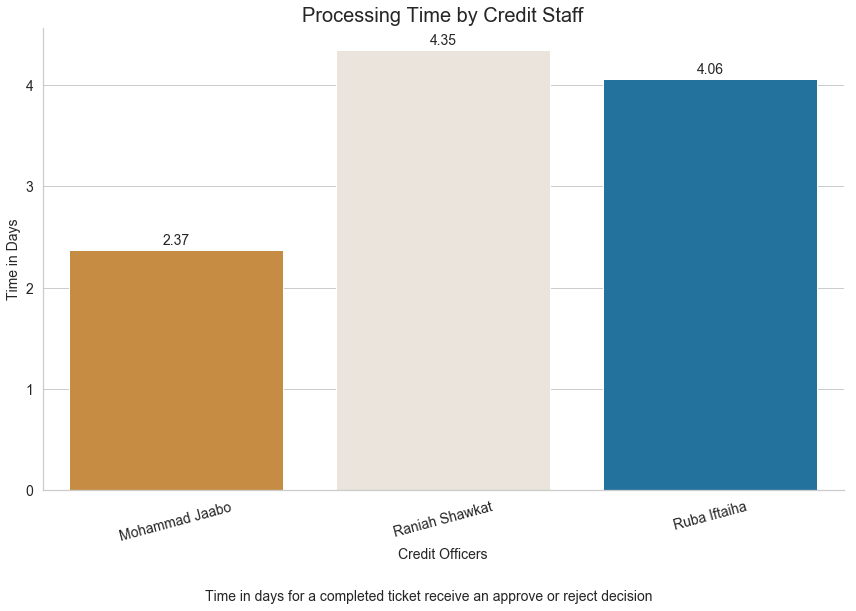

In [60]:
kpi_barplot(df=credit_kpi_df,
            y_column='credit_processing_time', 
            x_label_str='Credit Officers',
            y_label_str='Time in Days',
            title_str='Processing Time by Credit Staff',
            caption = 'Time in days for a completed ticket receive an approve or reject decision',
            annot=True, round_2=True
)

In [61]:
%%latex
\pagebreak

<IPython.core.display.Latex object>

### Sales Team - Completion and Processing Time

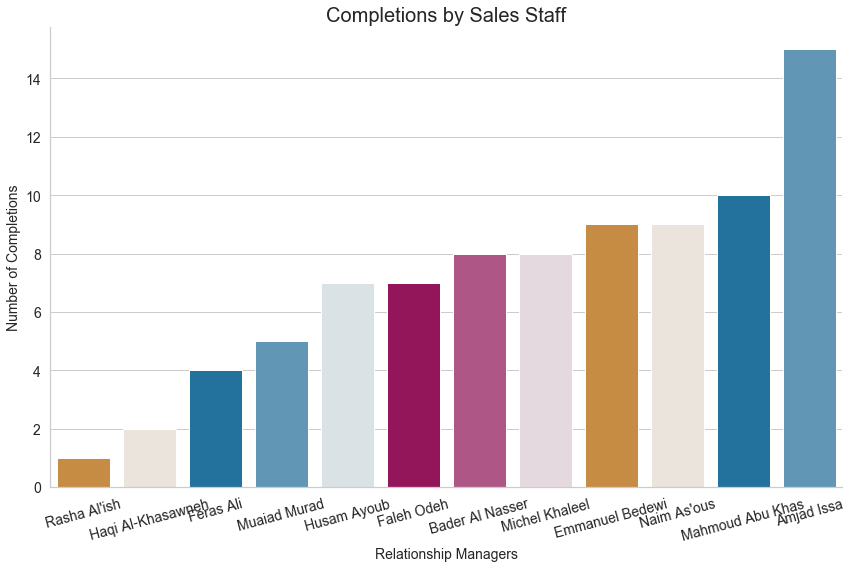

In [62]:
kpi_barplot(df=sales_kpi_df, 
           y_column='completions',
           x_label_str='Relationship Managers',
           y_label_str='Number of Completions',
           title_str='Completions by Sales Staff')

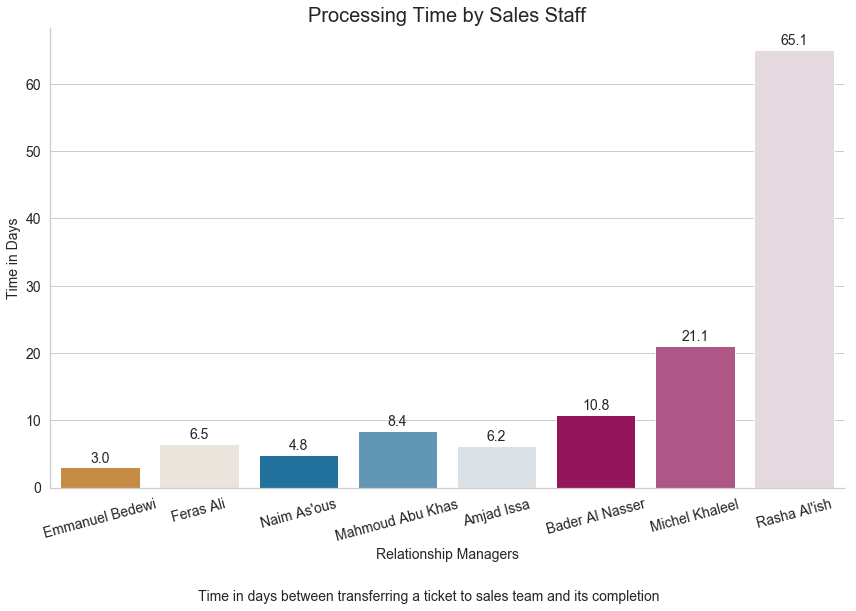

In [63]:
kpi_barplot(df=sales_kpi_df, 
           y_column='sales_processing_time',
           x_label_str='Relationship Managers',
           y_label_str='Time in Days',
           title_str='Processing Time by Sales Staff', 
           caption = 'Time in days between transferring a ticket to sales team and its completion',
           annot=True, round_0=True)